In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('salary_data_cleaned_final.csv')

In [69]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,same_state,company_age,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1


In [70]:
# function to describe the type of job
def simplify_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
# fuction to describe the position(seniority-wise) offered    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [71]:
# make a column for type of job
df['job position'] = df['Job Title'].apply(simplify_title)
df['job position'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job position, dtype: int64

In [72]:
# make a column for the seniority position of that job
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        545
senior    195
jr          2
Name: seniority, dtype: int64

In [73]:
# remove los angeles from job state, make it CA
df['job state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='los angeles' else 'CA')
df.drop('job_state',inplace=True,axis=1)            # remove the already present column

In [74]:
# calculate the length of job description provided by each company
df['description_len'] = df['Job Description'].apply(lambda x: len(x))
#df['desc_len']

In [75]:
# count the no. of competitors
df['no_of_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [76]:
# convert hourly wage to annual wage
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly_salary==1 else x.min_salary, axis=1)

In [77]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly_salary==1 else x.max_salary, axis=1)

# Visualization of data

In [78]:
df.describe()

,Rating,Founded,hourly_salary,employer_provided_salary,min_salary,max_salary,avg_salary,same_state,company_age,python,r_studio,spark,aws,excel,description_len,no_of_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


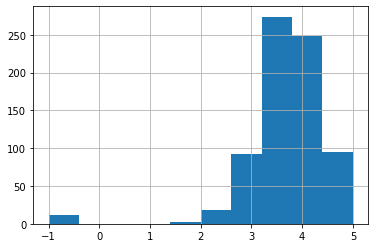

In [79]:
df.Rating.hist()

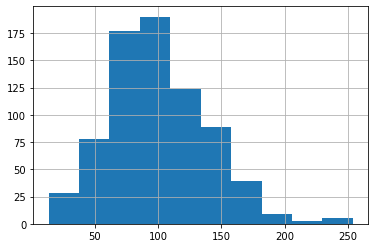

In [80]:
df.avg_salary.hist()

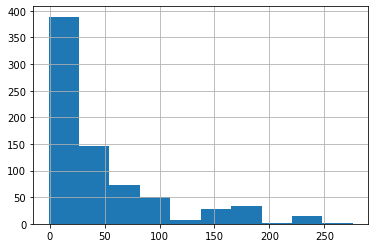

In [81]:
df.company_age.hist()

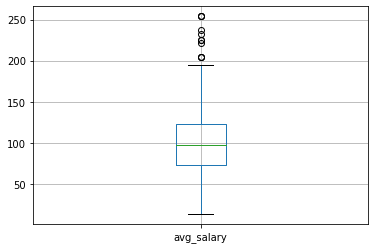

In [82]:
df.boxplot(column=['avg_salary'])

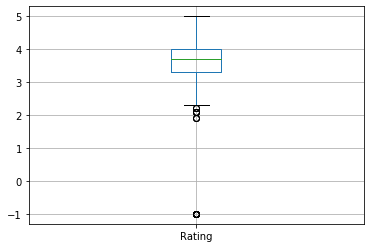

In [83]:
df.boxplot(column=['Rating'])

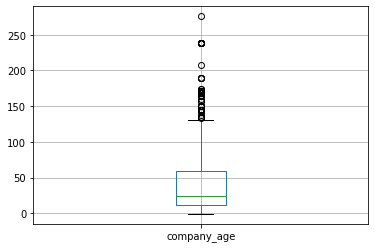

In [84]:
df.boxplot(column=['company_age'])

# Correlation between parameters

In [85]:
parameter_correlation = df[['company_age','avg_salary','Rating','description_len','no_of_competitors']].corr()
parameter_correlation

,company_age,avg_salary,Rating,description_len,no_of_competitors
company_age,1.000000,0.019655,0.021655,0.163911,0.126687
avg_salary,0.019655,1.000000,0.013492,0.078808,0.093813
Rating,0.021655,0.013492,1.000000,-0.012281,0.027190
description_len,0.163911,0.078808,-0.012281,1.000000,0.104620
no_of_competitors,0.126687,0.093813,0.027190,0.104620,1.000000


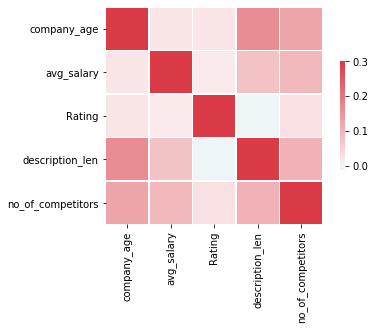

In [86]:
# heatmap to visualize correlation
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(parameter_correlation,vmax=.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5})

# Visualization of categorical data

In [88]:
df_categorical = df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_text','job state','same_state','python',
       'r_studio', 'spark', 'aws', 'excel','job position','seniority']]

Graph for Location: total = 200 different entries


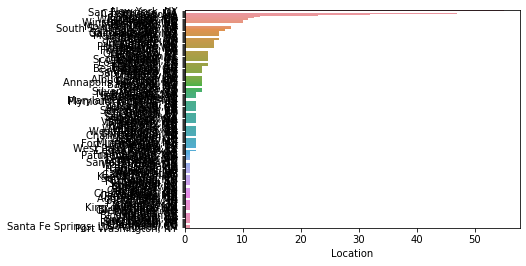

Graph for Headquarters: total = 198 different entries


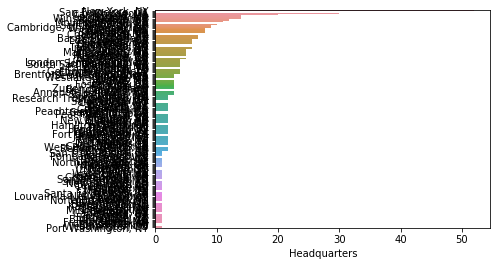

Graph for Size: total = 9 different entries


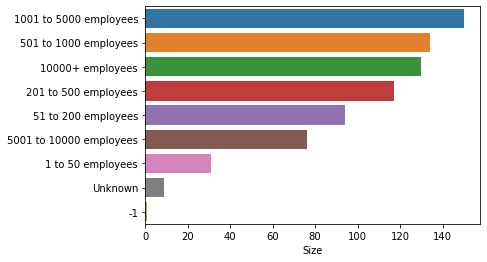

Graph for Type of ownership: total = 11 different entries


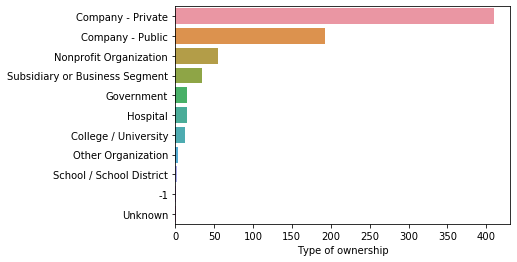

Graph for Industry: total = 60 different entries


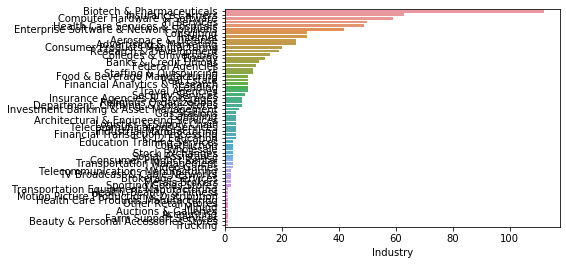

Graph for Sector: total = 25 different entries


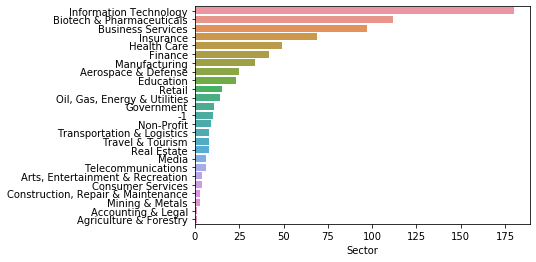

Graph for Revenue: total = 14 different entries


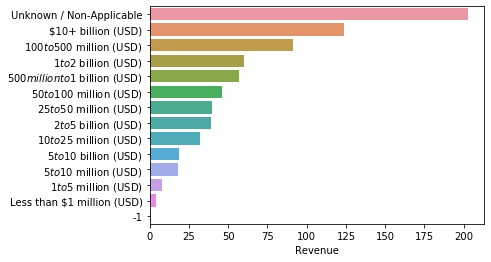

Graph for company_text: total = 343 different entries


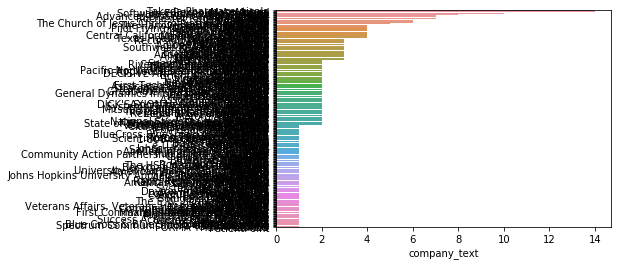

Graph for job state: total = 37 different entries


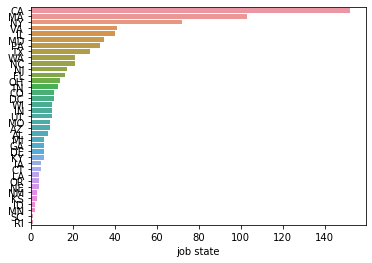

Graph for same_state: total = 2 different entries


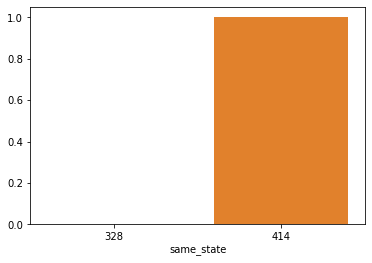

Graph for python: total = 2 different entries


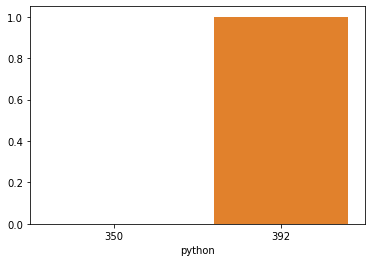

Graph for r_studio: total = 2 different entries


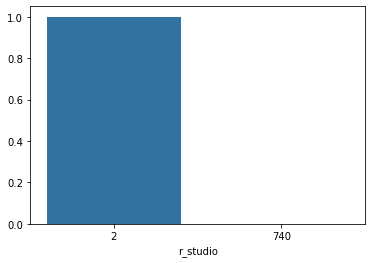

Graph for spark: total = 2 different entries


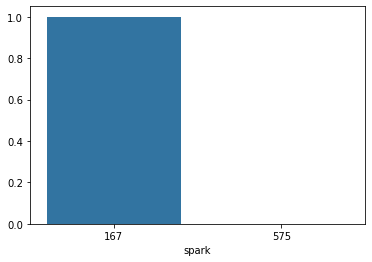

Graph for aws: total = 2 different entries


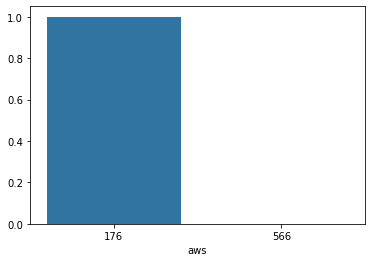

Graph for excel: total = 2 different entries


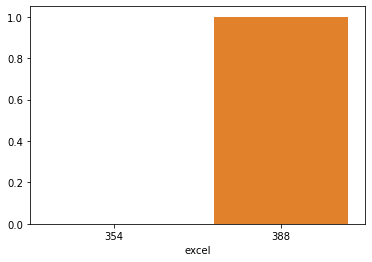

Graph for job position: total = 7 different entries


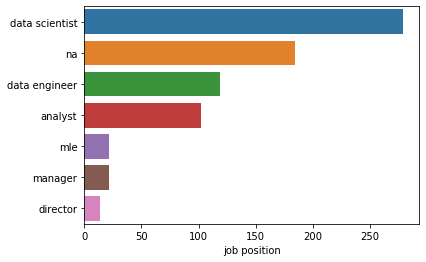

Graph for seniority: total = 3 different entries


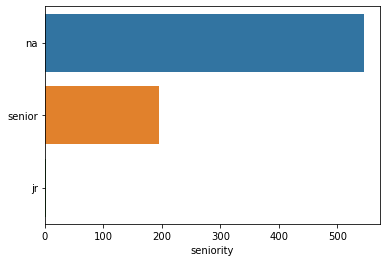

In [96]:
for i in df_categorical.columns:                         # for each column
    category_no = df_categorical[i].value_counts()            # contains all different entries in the column and count of those entries       
    print("Graph for %s: total = %d different entries" %(i,len(category_no)))  # i = column name, len(category_no) = no. of different entries in that column
    chart = sns.barplot(x=category_no,y=category_no.index)      # horizontal bar graphs
    #chart.set_xticklabels(chart.get_xticklabels(),rotation=90)   # x-axis labels appear vertically
    plt.show()

graph for Location: total = 20 different entries


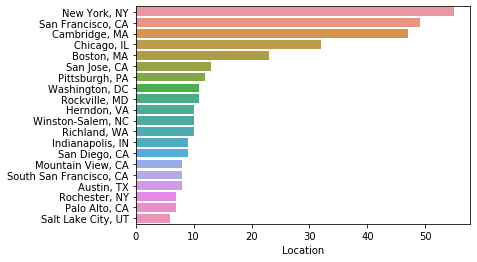

graph for Headquarters: total = 20 different entries


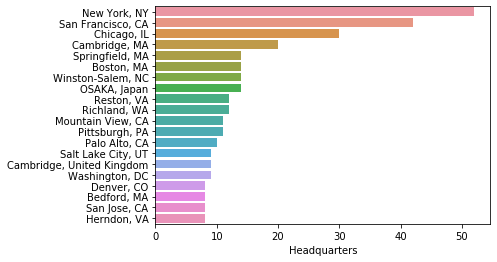

graph for company_text: total = 20 different entries


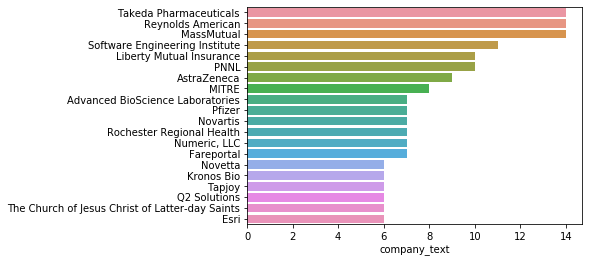

In [95]:
for i in df_categorical[['Location','Headquarters','company_text']].columns:
    category_no = df_categorical[i].value_counts()[:20]
    print("graph for %s: total = %d different entries" % (i, len(category_no)))
    chart = sns.barplot(x=category_no, y=category_no.index)
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

# Salary based on different categories

In [122]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly_salary', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_text', 'same_state', 'company_age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'job position', 'seniority',
       'job state', 'description_len', 'no_of_competitors'],
      dtype='object')

In [98]:
pd.pivot_table(df,index='job position', values='avg_salary')      # salary based on type of job

,avg_salary
job position,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [99]:
pd.pivot_table(df,index=['job position','seniority'], values='avg_salary')   # salary based on type and seniority

avg_salary
job position   seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          97.493976
               senior     123.638889
data scientist jr         106.500000
               na         110.525510
               senior     134.524390
director       na         168.607143
manager        na          84.022727
mle            na         126.218750
               senior     127.000000
na             na          76.885714
               senior     110.204545

In [107]:
# salary based on the state the job is located
pd.options.display.max_rows   # to get all the rows
pd.set_option('display.max_rows',None)   
pd.pivot_table(df,index=['job state','job position'], values='avg_salary', aggfunc='count').sort_values('job state',ascending=False)

avg_salary
job state job position              
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

# Average Salary based on different parameters

In [112]:
# make new dataframe for desired parameters
df_salaries = df[['Rating','Industry','Sector','Revenue','no_of_competitors','hourly_salary','employer_provided_salary','python',
       'r_studio', 'spark', 'aws', 'excel','Type of ownership','avg_salary']]

In [118]:
for i in df_salaries.columns:
    if i!='avg_salary':
        print(i)
        print(pd.pivot_table(df_salaries,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))
        print("###################################################################################################")
        print('\n')

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
###################################################################################################


Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            1

# Save the updated data for prediction model

In [123]:
df.to_csv('model_data.csv',index=False)